# 🚕 Taxi Fare Prediction Challenge

**Dive into the world of ride-sharing economics and build a model to predict taxi trip fares!**

This challenge leverages a realistic synthetic dataset, perfect for honing your regression skills and exploring pricing dynamics within the taxi industry.  Put your data science prowess to the test and develop a robust fare prediction model.

[![Taxi Dataset](https://img.shields.io/badge/Dataset-Kaggle-blueviolet)](https://www.kaggle.com/datasets/denkuznetz/taxi-price-prediction)


## Dataset Overview

This dataset simulates taxi trip data, incorporating key factors influencing fare calculation.  Your goal is to accurately predict the `Fare Amount` based on provided features.


## Feature Breakdown

| Feature           | Description                                     | Data Type    |
|-------------------|-------------------------------------------------|-------------|
| `Distance (km)`    | Trip length                                      | Numeric     |
| `Pickup Time`    | Trip start time                               | DateTime    |
| `Dropoff Time`   | Trip end time                                | DateTime    |
| `Traffic Condition`| Traffic level (light, medium, heavy)           | Categorical |
| `Passenger Count` | Number of passengers                           | Numeric     |
| `Weather Condition`| Weather status (clear, rain, snow)             | Categorical |
| `Trip Duration (min)` | Total trip time in minutes                    | Numeric     |
| `Fare Amount (USD)`| **Target Variable:** The cost of the trip      | Numeric     |



## Challenge Objectives

Construct a linear regression model to predict taxi fares.  Follow these steps:

1. **Data Ingestion & Exploration:**  Load the dataset and perform thorough Exploratory Data Analysis (EDA) to understand the data distribution, identify potential outliers, and uncover relationships between features.

2. **Feature Engineering:**  Craft new features from the existing ones to potentially improve model performance.  Think about time-based features (hour of day, day of week), or combined features (distance/duration).

3. **Preprocessing:**
    * **Data Cleaning:** Handle missing values, outliers, and any inconsistencies in the data.
    * **Data Splitting:** Partition the data into training and testing sets.

4. **Model Training & Evaluation:**
    * Implement linear regression models using the methods that you learned today.
    * Consider regularization techniques (LASSO, Ridge) to prevent overfitting and improve generalization.
    * Evaluate model performance using appropriate metrics (e.g., RMSE, MAE, R-squared).


##  Get Started!

Download the dataset, explore the data, and start building your predictive model! Good luck! 🚕💨

## Read the data

In [ ]:
# importing libraries
import kagglehub
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error

In [ ]:
# Download the dataset from kaggle
path = kagglehub.dataset_download("denkuznetz/taxi-price-prediction")
print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/denkuznetz/taxi-price-prediction/versions/1


In [ ]:
# Read the data using pandas
csv_path = os.path.join(path, "taxi_trip_pricing.csv")
taxiPricing = pd.read_csv(csv_path)
taxiPricing.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180


## Data Preprocessing & Exploratory Data Analysis (EDA)



In [ ]:
# We will check for any missing values and replace it with the mean or mode
missing_values = taxiPricing.isnull().sum()
print("Missing Values per Column:")
print(missing_values[missing_values > 0])

Missing Values per Column:
Trip_Distance_km         50
Time_of_Day              50
Day_of_Week              50
Passenger_Count          50
Traffic_Conditions       50
Weather                  50
Base_Fare                50
Per_Km_Rate              50
Per_Minute_Rate          50
Trip_Duration_Minutes    50
Trip_Price               49
dtype: int64


In [ ]:
# Replace missing values with the mode or mean
for column in taxiPricing.columns:
    if taxiPricing[column].isnull().any():
        if pd.api.types.is_numeric_dtype(taxiPricing[column]):
            taxiPricing[column].fillna(taxiPricing[column].mean(), inplace=True)
        else:
            taxiPricing[column].fillna(taxiPricing[column].mode()[0], inplace=True)

missing_values_after = taxiPricing.isnull().sum()
print("\nMissing Values After Imputation:")
print(missing_values_after[missing_values_after > 0])


Missing Values After Imputation:
Series([], dtype: int64)


<ipython-input-19-5a44ed3b1bf8>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  taxiPricing[column].fillna(taxiPricing[column].mean(), inplace=True)
<ipython-input-19-5a44ed3b1bf8>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

In [ ]:
taxiPricing.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.350000,Morning,Weekday,3.0,Low,Clear,3.560000,0.80,0.32,53.82,36.262400
1,47.590000,Afternoon,Weekday,1.0,High,Clear,3.502989,0.62,0.43,40.57,56.874773
2,36.870000,Evening,Weekend,1.0,High,Clear,2.700000,1.21,0.15,37.27,52.903200
3,30.330000,Evening,Weekday,4.0,Low,Clear,3.480000,0.51,0.15,116.81,36.469800
4,27.070547,Evening,Weekday,3.0,High,Clear,2.930000,0.63,0.32,22.64,15.618000


In [ ]:
# We need first to replace categorical data to numerical to do the EDA easily
taxiPricing['Time_of_Day'].replace(['Morning', 'Afternoon', 'Evening', 'Night'], [0, 1, 2, 3], inplace=True)
taxiPricing['Day_of_Week'].replace(['Weekday', 'Weekend'], [0, 1], inplace=True)
taxiPricing['Traffic_Conditions'].replace(['Low', 'Medium', 'High'], [0, 1, 2], inplace=True)
taxiPricing['Weather'].replace(['Clear', 'Rain', 'Snow'], [0, 1, 2], inplace=True)

<ipython-input-21-823354b7628e>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  taxiPricing['Time_of_Day'].replace(['Morning', 'Afternoon', 'Evening', 'Night'], [0, 1, 2, 3], inplace=True)
<ipython-input-21-823354b7628e>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  taxiPricing['Day_of_Week'].replace(['Weekday', 'Weekend'], [0, 1], inplace=True)
<ipython-input-21-823354b7628e>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `

In [ ]:
taxiPricing.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.350000,0,0,3.0,0,0,3.560000,0.80,0.32,53.82,36.262400
1,47.590000,1,0,1.0,2,0,3.502989,0.62,0.43,40.57,56.874773
2,36.870000,2,1,1.0,2,0,2.700000,1.21,0.15,37.27,52.903200
3,30.330000,2,0,4.0,0,0,3.480000,0.51,0.15,116.81,36.469800
4,27.070547,2,0,3.0,2,0,2.930000,0.63,0.32,22.64,15.618000


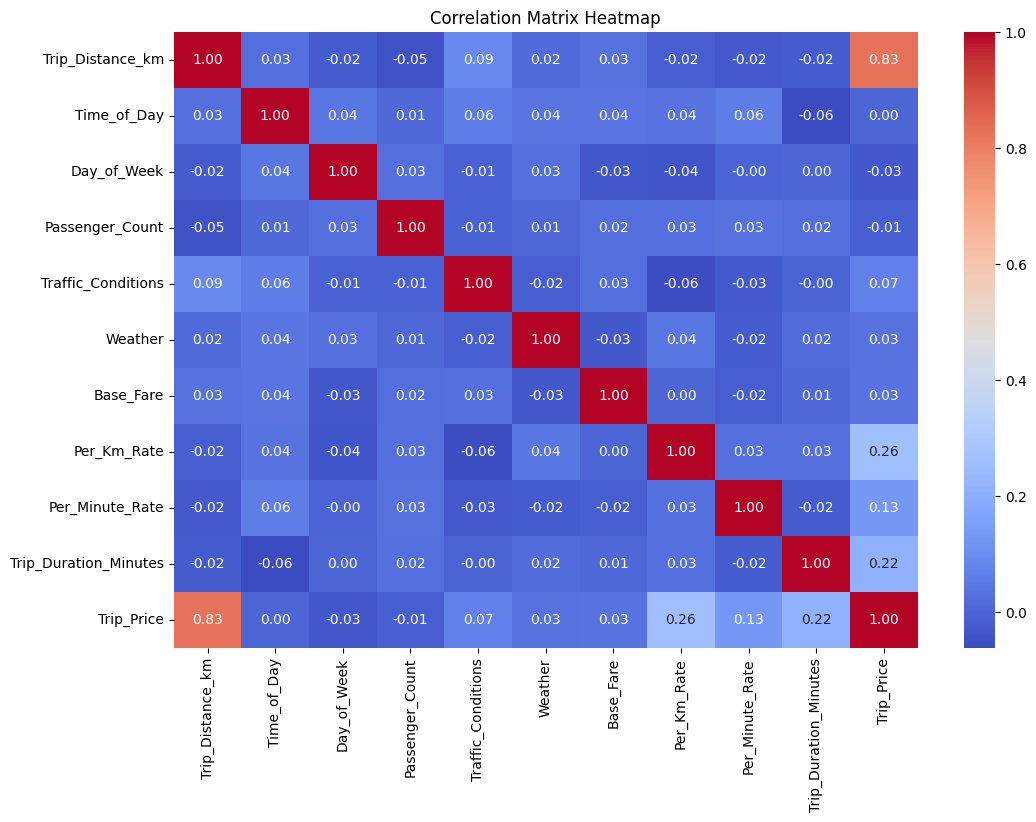

In [ ]:
# Calculate the correlation matrix
correlation_matrix = taxiPricing.corr()

# Create the heatmap
plt.figure(figsize=(12, 8))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
# Delete the columns with very low correlation
taxiPricing = taxiPricing.drop('Time_of_Day', axis=1)
taxiPricing = taxiPricing.drop('Passenger_Count', axis=1)
print(taxiPricing.head())

   Trip_Distance_km  Day_of_Week  Traffic_Conditions  Weather  Base_Fare  \
0         19.350000            0                   0        0   3.560000   
1         47.590000            0                   2        0   3.502989   
2         36.870000            1                   2        0   2.700000   
3         30.330000            0                   0        0   3.480000   
4         27.070547            0                   2        0   2.930000   

   Per_Km_Rate  Per_Minute_Rate  Trip_Duration_Minutes  Trip_Price  
0         0.80             0.32                  53.82   36.262400  
1         0.62             0.43                  40.57   56.874773  
2         1.21             0.15                  37.27   52.903200  
3         0.51             0.15                 116.81   36.469800  
4         0.63             0.32                  22.64   15.618000  


## Train regression models

In [ ]:
# Implementing Linear regression using sklearn
# Select features (X) and target variable (y)
features = ['Trip_Distance_km', 'Day_of_Week', 'Traffic_Conditions', 'Weather', 'Base_Fare', 'Per_Km_Rate', 'Per_Minute_Rate', 'Trip_Duration_Minutes']
target = 'Trip_Price'

X = taxiPricing[features]
y = taxiPricing[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Squared Error (MSE): 194.81748670766953
Root Mean Squared Error (RMSE): 13.957703489746066


In [ ]:
# Implementing Linear regression using numpy only
# Add a bias term (intercept) to the feature matrix
X_train = np.concatenate((np.ones((X_train.shape[0], 1)), X_train), axis=1)
X_test = np.concatenate((np.ones((X_test.shape[0], 1)), X_test), axis=1)

# Calculate the coefficients using the normal equation
coefficients = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train

# Make predictions
y_pred = X_test @ coefficients

# Calculate Mean Squared Error
mse = np.mean((y_test - y_pred)**2)
rmse = np.sqrt(mse)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Squared Error (MSE): 194.8174867076705
Root Mean Squared Error (RMSE): 13.957703489746102


In [ ]:
# Implement the regression with lasso and ridge regularization
# Lasso Regression
lasso_model = Lasso(alpha=0.1)  # You can adjust the alpha parameter
lasso_model.fit(X_train, y_train)
lasso_pred = lasso_model.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_rmse = np.sqrt(lasso_mse)

print(f"Lasso Regression - Mean Squared Error (MSE): {lasso_mse}")
print(f"Lasso Regression - Root Mean Squared Error (RMSE): {lasso_rmse}")


# Ridge Regression
ridge_model = Ridge(alpha=0.1)  # You can adjust the alpha parameter
ridge_model.fit(X_train, y_train)
ridge_pred = ridge_model.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_rmse = np.sqrt(ridge_mse)

print(f"Ridge Regression - Mean Squared Error (MSE): {ridge_mse}")
print(f"Ridge Regression - Root Mean Squared Error (RMSE): {ridge_rmse}")

# Comparison
print("\nModel Comparison:")
print(f"{'Model':<20} {'MSE':<10} {'RMSE':<10}")
print(f"{'Lasso':<20} {lasso_mse:<10.4f} {lasso_rmse:<10.4f}")
print(f"{'Ridge':<20} {ridge_mse:<10.4f} {ridge_rmse:<10.4f}")

Lasso Regression - Mean Squared Error (MSE): 198.375144644359
Lasso Regression - Root Mean Squared Error (RMSE): 14.084571155855581
Ridge Regression - Mean Squared Error (MSE): 195.04657292621968
Ridge Regression - Root Mean Squared Error (RMSE): 13.965907522471273

Model Comparison:
Model                MSE        RMSE      
Lasso                198.3751   14.0846   
Ridge                195.0466   13.9659   


In [ ]:
# The mean baseline model to have something to compare our result with
# Calculate the mean of the target variable in the training set
baseline_prediction = np.mean(y_train)

# Create an array of baseline predictions with the same length as the test set
baseline_predictions = np.full(len(y_test), baseline_prediction)

# Calculate the baseline MSE and RMSE
baseline_mse = mean_squared_error(y_test, baseline_predictions)
baseline_rmse = np.sqrt(baseline_mse)

print(f"Baseline Mean Squared Error (MSE): {baseline_mse}")
print(f"Baseline Root Mean Squared Error (RMSE): {baseline_rmse}")

Baseline Mean Squared Error (MSE): 840.4106404217001
Baseline Root Mean Squared Error (RMSE): 28.98983684710385


This challenge is made by [Ali Alqutayfi](https://www.linkedin.com/in/ali-alqutayfi/).